## Step 1: Import Libraries

The following libraries are imported:
- **NumPy**: For numerical computations.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib** and **Seaborn**: For data visualization.
- **scikit-learn**:
  - For data preprocessing (splitting, scaling, and encoding).
  - For implementing Logistic Regression for multi-class classification.
  - For evaluating model performance.


In [47]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

## Step 2: Load the Dataset

The dataset is loaded using **Pandas**.  
Ensure the dataset contains:
- Features (independent variables).
- A multi-class target variable (e.g., classes like "A", "B", "C").

The first few rows of the dataset are displayed to understand its structure.


In [48]:
data = pd.read_csv('obesity.csv')

In [49]:
data.head(10)

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25,1
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25,1
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50,1
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75,2
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50,3
5,1.62,53.0,0,0,0,0.361418,0.5,0.404704,0.333333,0.5,0.000000,1.092724,0.516552,1.00,1
6,1.50,55.0,1,0,0,0.361418,1.0,0.404704,0.333333,0.5,0.333333,1.092724,0.516552,0.50,1
7,1.64,53.0,0,0,0,2.766876,0.5,0.404704,0.333333,0.5,1.000000,1.092724,0.516552,0.50,1
8,1.78,64.0,1,0,0,0.361418,1.0,0.404704,0.333333,0.5,0.333333,0.550985,2.472136,0.75,1
9,1.72,68.0,1,0,0,0.361418,0.5,0.404704,0.333333,0.5,0.333333,0.550985,1.439033,0.50,1


## Step 3: Explore and Preprocess the Dataset

1. **Check for Missing Values**: Ensure the dataset is clean and ready for analysis.
2. **Encode the Target Variable**: Since the target variable contains multiple classes in categorical format (e.g., "A", "B", "C"), **LabelEncoder** is used to convert it into numerical form.


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Height                          2086 non-null   float64
 1   Weight                          2086 non-null   float64
 2   family_history_with_overweight  2086 non-null   int64  
 3   SCC                             2086 non-null   int64  
 4   MTRANS_Walking                  2086 non-null   int64  
 5   FAVC_z                          2086 non-null   float64
 6   FCVC_minmax                     2086 non-null   float64
 7   NCP_z                           2086 non-null   float64
 8   CAEC_minmax                     2086 non-null   float64
 9   CH2O_minmax                     2086 non-null   float64
 10  FAF_minmax                      2086 non-null   float64
 11  TUE_z                           2086 non-null   float64
 12  CALC_z                          20

In [51]:
data.describe()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,1.702045,86.622985,0.817354,0.045062,0.026366,0.639326,0.709818,0.763670,0.379834,0.504361,0.337873,0.843202,0.855417,0.499760,3.110259
std,0.093419,26.256245,0.386469,0.207491,0.160260,0.769120,0.267493,0.645761,0.155956,0.306578,0.283687,0.537726,0.518064,0.353723,1.993832
min,1.450000,39.000000,0.000000,0.000000,0.000000,0.361418,0.000000,0.002375,0.000000,0.000000,0.000000,0.000146,0.516552,0.000000,0.000000
25%,1.630000,65.130595,1.000000,0.000000,0.000000,0.361418,0.500000,0.404704,0.333333,0.291005,0.042901,0.466622,0.516552,0.250000,1.000000
50%,1.701383,83.000000,1.000000,0.000000,0.000000,0.361418,0.695087,0.404704,0.333333,0.500000,0.333333,0.813973,0.516552,0.500000,3.000000
75%,1.768770,108.009452,1.000000,0.000000,0.000000,0.361418,1.000000,1.031717,0.333333,0.740243,0.557356,1.092724,1.439033,0.750000,5.000000
max,1.980000,165.057269,1.000000,1.000000,1.000000,2.766876,1.000000,2.164116,1.000000,1.000000,1.000000,2.194694,4.427721,1.000000,6.000000


In [52]:
data.isnull().sum()

Height                            0
Weight                            0
family_history_with_overweight    0
SCC                               0
MTRANS_Walking                    0
FAVC_z                            0
FCVC_minmax                       0
NCP_z                             0
CAEC_minmax                       0
CH2O_minmax                       0
FAF_minmax                        0
TUE_z                             0
CALC_z                            0
Age_bin_minmax                    0
NObeyesdad                        0
dtype: int64

In [53]:
count = data.iloc[:,14].value_counts()

In [54]:
count

NObeyesdad
4    342
6    323
5    297
2    289
1    285
3    278
0    272
Name: count, dtype: int64

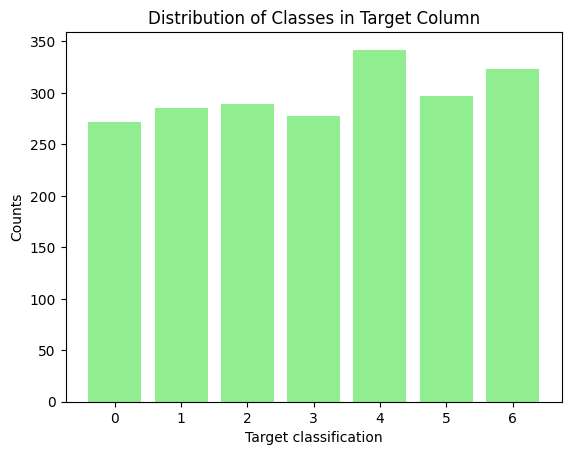

In [55]:
plt.bar(count.index, count.values, color='lightgreen')
plt.title('Distribution of Classes in Target Column')
plt.xlabel('Target classification')
plt.ylabel('Counts')
plt.show()

## Step 4: Split the Dataset

The dataset is split into:
- **Features (x)**: Independent variables used for prediction.
- **Target (y)**: Dependent variable (multi-class target).

Additionally, the dataset is divided into:
- **Training Set**: Used to train the model.
- **Test Set**: Used to evaluate the model's performance.


In [56]:
x = data.iloc[:,0:14]

In [57]:
x.head()

,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax
0,1.62,64.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.000000,0.550985,1.439033,0.25
1,1.52,56.0,1,1,0,2.766876,1.0,0.404704,0.333333,1.0,1.000000,1.092724,0.516552,0.25
2,1.80,77.0,1,0,0,2.766876,0.5,0.404704,0.333333,0.5,0.666667,0.550985,2.472136,0.50
3,1.80,87.0,0,0,1,2.766876,1.0,0.404704,0.333333,0.5,0.666667,1.092724,2.472136,0.75
4,1.78,89.8,0,0,0,2.766876,0.5,2.164116,0.333333,0.5,0.000000,1.092724,0.516552,0.50


In [58]:
y = data.iloc[:,14]

In [59]:
y

0       1
1       1
2       1
3       2
4       3
       ..
2081    6
2082    6
2083    6
2084    6
2085    6
Name: NObeyesdad, Length: 2086, dtype: int64

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=43)

## Step 5: Scale the Features

Feature scaling is applied using **StandardScaler** to normalize the feature values, ensuring they contribute equally to the model's learning process.


In [61]:
scaler = StandardScaler()

In [62]:
x_train = scaler.fit_transform(x_train)

In [63]:
x_test = scaler.transform(x_test)

## Step 6: Train the Model

A **Logistic Regression** model is trained.
- `max_iter=1000`: Maximum number of iterations for convergence.

The model learns the relationships between the features and the target variable.

In [64]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

print("Model trained successfully!")


Model trained successfully!


## Step 7: Evaluate the Model

The model is evaluated using:
1. **Accuracy**: The proportion of correctly predicted instances.
2. **Confusion Matrix**: A matrix that displays true positives, true negatives, false positives, and false negatives for each class.

These metrics help assess the overall performance of the multi-class classification model.


In [65]:
# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8827751196172249

Confusion Matrix:
 [[52  1  0  0  0  0  0]
 [ 4 42  6  1  0  0  0]
 [ 0  0 47 14  0  0  0]
 [ 0  0 10 34  2  0  0]
 [ 0  0  1  3 62  5  0]
 [ 0  0  0  0  2 66  0]
 [ 0  0  0  0  0  0 66]]


## Step 8: Visualize the Confusion Matrix

The **Confusion Matrix** is visualized using a heatmap.  
This visualization provides insights into the model's performance for each class and helps identify misclassifications.


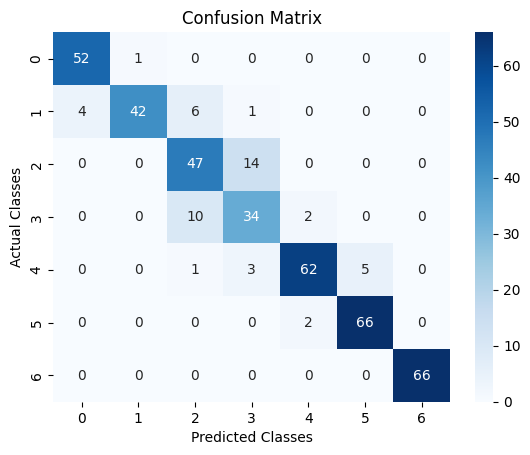

In [66]:
# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot = True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()


## Step 9: Compare Actual and Predicted Values

A DataFrame is created to compare the **actual values** (`y_test`) and the **predicted values** (`y_pred`).  
This helps visualize how well the model performs for individual instances.


In [67]:
# Compare y_test and y_pred in a DataFrame
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [68]:
comparison.head()

,Actual,Predicted
370,1,2
1245,4,4
23,1,0
1299,4,4
1407,4,4


## Step 10: Save the Model

The trained model is saved using **Joblib** for future use.  
This allows reloading the model for predictions without retraining.


In [69]:
# Save the model using Joblib
import joblib
joblib.dump(model, 'multi_class_model.joblib')
joblib.dump(scaler,'ss.joblib')

print("Model saved as 'multi_class_model.joblib'")

Model saved as 'multi_class_model.joblib'


## Step 11: Conclusion

The model achieved an **accuracy score of 0.88**, indicating that it correctly classified 88% of the instances in the test set.

### Key Observations:
- The model demonstrates a good level of accuracy for a multi-class classification task.
- The comparison between actual and predicted values, along with the confusion matrix, shows the model's performance across all classes.


Overall, the Logistic Regression model provided a solid baseline for this multi-class classification problem.
